In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

# Gradient Descent

### Create Data

In [3]:
n = 20                      
true_theta1 = 0.5           # Slope

iterations = 6
learning_rate = 1
initial_theta1 = 0

x = np.linspace(-1, 1, n)
y = true_theta1 * x
print('Data created')
pd.DataFrame({'x':list(x), 'y':list(y)}).round(3)

Data created


,x,y
0,-1.000,-0.500
1,-0.895,-0.447
2,-0.789,-0.395
3,-0.684,-0.342
4,-0.579,-0.289
5,-0.474,-0.237
6,-0.368,-0.184
7,-0.263,-0.132
8,-0.158,-0.079
9,-0.053,-0.026


### Define hypothesis and cost function

In [4]:
# Define the hypothesis
def hypothesis(x, theta1):
    return theta1 * x
    
# Define the cost function :: objective function to be minimised
def cost_func(theta1):
    theta1 = np.atleast_2d(theta1)
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

### Update weights

In [5]:
# Initialize tracking
theta1_history = [initial_theta1]
cost_history = [cost_func(initial_theta1)[0]]

# Gradient descent loop
for i in range(iterations - 1):
    prev_theta1 = theta1_history[-1]
    y_pred = hypothesis(x, prev_theta1)
    error = y_pred - y

    grad_theta1 = np.mean(error * x)
    new_theta1 = prev_theta1 - learning_rate * grad_theta1

    theta1_history.append(new_theta1)
    cost_history.append(cost_func(new_theta1)[0])

# Plotting
colors = ['b', 'g', 'm', 'c', 'orange']
colors = (colors * (iterations // len(colors) + 1))[:iterations]


### Visualise gradient

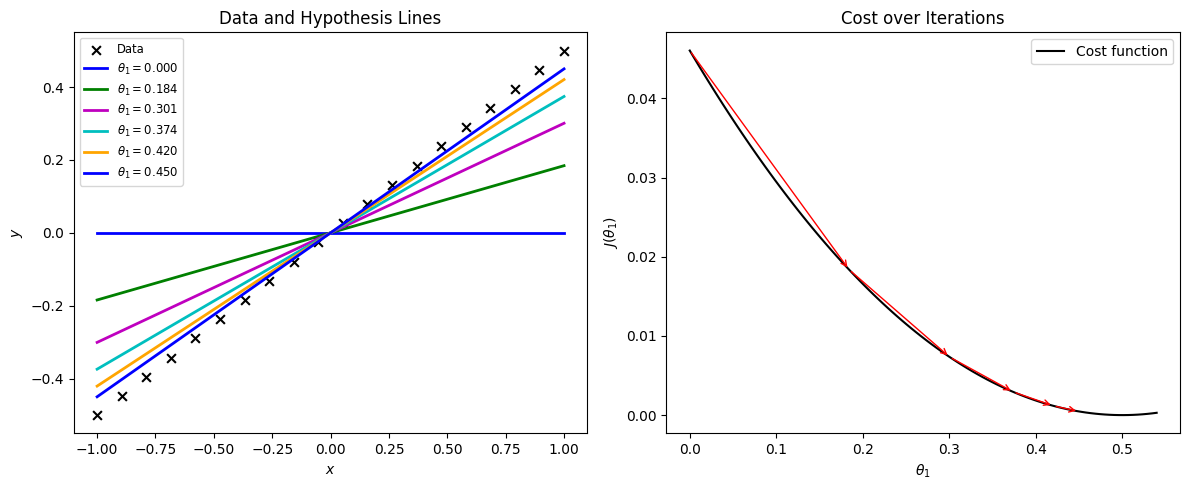

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Left plot: Data with hypothesis lines
ax[0].scatter(x, y, marker='x', s=40, color='k', label='Data')

for j in range(iterations):
    ax[0].plot(x, hypothesis(x, theta1_history[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1_history[j]))
    
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title("Data and Hypothesis Lines")
ax[0].legend(loc='upper left', fontsize='small')

# Right plot: Cost function with path of theta updates
theta1_range = np.linspace(min(theta1_history)*1.2, max(theta1_history)*1.2, 100)
cost_range = cost_func(theta1_range[:, np.newaxis])
ax[1].plot(theta1_range, cost_range, 'k', label='Cost function')

# Plot points and arrows showing descent path
for k in range(1,iterations):
    ax[1].annotate('', xy=(theta1_history[k], cost_history[k]), xytext=(theta1_history[k-1], cost_history[k-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title("Cost over Iterations")
ax[1].legend()

plt.tight_layout()
plt.show()